
### 1- Adquirir tres imagenes en tonalidad de grises de dos objetos distintos con ilumninacion de intensidad baja, media y alta.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Para que las salidas queden empotradas
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Imagenes
path1 = '../Imagenes/sci-2.bmp'
path2 = '../Imagenes/sci-3.bmp'
path3 = '../Imagenes/sci-4.bmp'
path4 = '../Imagenes/tar-5.bmp'
path5 = '../Imagenes/tar-6.bmp'
path6 = '../Imagenes/tar-7.bmp'

In [4]:
#Leemos las imagenes
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
img3 = cv2.imread(path3)
img4 = cv2.imread(path4)
img5 = cv2.imread(path5)
img6 = cv2.imread(path6)

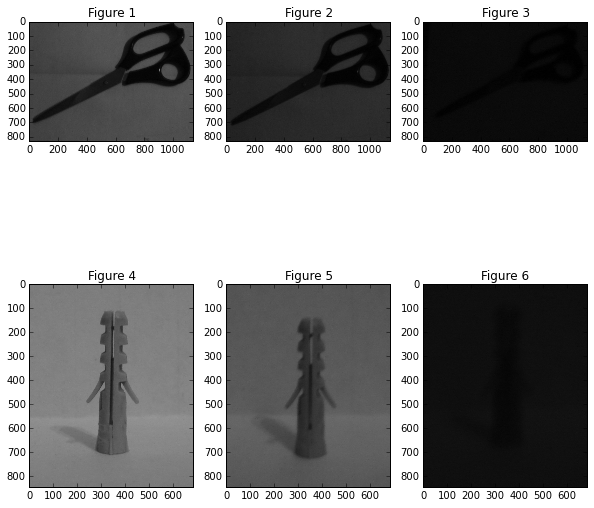

In [5]:
#Plots
fig, axarr = plt.subplots(2, 3)
fig.set_size_inches(10,10)
axarr[0, 0].imshow(img1)
axarr[0, 0].set_title('Figure 1')
axarr[0, 1].imshow(img2)
axarr[0, 1].set_title('Figure 2')
axarr[0, 2].imshow(img3)
axarr[0, 2].set_title('Figure 3')
axarr[1, 0].imshow(img4)
axarr[1, 0].set_title('Figure 4')
axarr[1, 1].imshow(img5)
axarr[1, 1].set_title('Figure 5')
axarr[1, 2].imshow(img6)
axarr[1, 2].set_title('Figure 6')
plt.show()

### 2- Mostrar el efecto del ruido producido por en una imagen que se toma con bajas condiciones de luminosidad

Existe un índice que nos indica la proporción señal/ruido presente en la captura de una imágen digital, ese índice se denomina ISO.
En las cámaras digitales, el sensor o CCD2 es el chip encargado de la captura de la imágen. Esta compuesto por una malla de miles de celdas fotosensibles en las que se recibe la imagen formada por el lente.
Cada una de esas celdas genera una corriente el eléctrica en presencia de la luz. Esa corriente eléctrica será luego convertida en datos numéricos que se almacenarán en forma digital binaria en la memoria de la cámara dando origen a un píxel.
Cada una de esas celdas genera una cantidad más o menos fija de corriente eléctrica (y por lo tanto de datos)
al azar, aún en ausencia de la luz y en relación a la temperatura.
La sensibilidad de cada uno de los elementos del sensor es fija, con un valor aproximado equivalente a 100 ISO. Los índices ISO superiores que nos ofrece la cámara digital se logran no por un incremento en la sensibilidad de los elementos captores, sino por una amplificación posterior de la señal que estos emiten. Como estos elementos tienen una emisión de señal de base más o menos fija, al capturar una señal lumínica débil y amplificarla, estamos amplificando también una buena porción de la emisión de datos aleatoria del chip, con lo que se mezclar ́a una cantidad de señal aleatoria sin contenido a la señal correspondiente a la imagen. La mayor calidad de imagen con una cámara digital se obtendrá usándola a su menor sensibilidad ISO equivalente.
El uso de sensibilidades ISO mayores se traducirá en un aumento de pixeles distribuidos al azar, principalmente en las zonas de sombra de la imagen. El ruido, a diferencia del grano, no será proporcional en toda la imagen, sino que se manifestará de forma más evidente en las zonas oscuras.
El ruido es más notable en algunos canales que en otros, normalmente el canal azul suele ser el que contiene más ruido.
Para demostrar esta amplificación de señal aleatoria bajo una señal lumínica débil, tomamos la imágen y
realizamos un corte, para tener referencia de donde se realizó ponemos a continuación la imágen y el corte realizado:

Para mostrar los efectos del ruido presentes bajo baja iluminación, vamos a mostrar en una imagen tomada en esa situacion de iluminación como se ve el ruido presente graficando los valores de una linea de pixels en la imagen.

In [6]:
#para leer con Matplotlib python puro
import matplotlib.image as mpimg

In [7]:
#imagen sacada con bajo nivel de iluminacion
path3 = '../Imagenes/sci-4.bmp'


In [8]:
#vamos a demostrar como se amplifica el ruido en el sensor ccd

img3_opencv = cv2.imread(path3, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img3_matplot = mpimg.imread(path3)  # leemos con matplotlib(python puro)


In [9]:
#extraigo toda la fila 37
row_37 = img3_opencv[37, :]  # Slicing


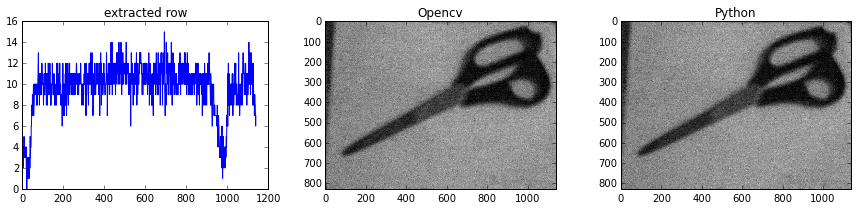

In [10]:
#plots
#******************************************************************************
fig, array_ax = plt.subplots(1, 3)
fig.set_size_inches(15,3)
array_ax[0].plot(row_37)
array_ax[0].set_title('extracted row')
array_ax[1].imshow(img3_opencv,cmap='gray')
array_ax[1].set_title('Opencv')
array_ax[2].imshow(img3_matplot,cmap='gray')
array_ax[2].set_title('Python')
plt.show()

###4. Mostrar el efecto de descomponer una imagen color con el formato bmp en sus tres canales (R,G,B)  y compararla con la original (Se entregaran imagenes de prueba para realizar este punto).

El modelo de color RGB es un modelo aditivo en el cual las representaciones de los colores primarios Red, Green y Blue son sumados de varias maneras para lograr toda la gama de colores. Existe una representación geometrica de este modelo de color:



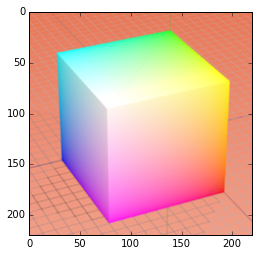

In [11]:
img_rgb = cv2.imread('../Imagenes/220px-RGB_color_solid_cube.png')
plt.imshow(img_rgb)

En opencv-python cada pixel es representado como un numpy array de 3 dimensiones.

In [12]:
# test image
path1 = '../Imagenes/Lapices.bmp'
# read the image
img1 = cv2.imread(path1)

In [13]:
# Pixel representation
img1[0,0]

array([253, 253, 253], dtype=uint8)

In [14]:
#prealocate the images
img1_red = np.zeros_like(img1)
img1_blue = np.zeros_like(img1)
img1_green = np.zeros_like(img1)

Para extraer cada canal utilizamos fancy indexcing y slicing(que son cosas que nos permite numpy)

In [15]:
#Copy the channels
img1_red[:, :, 0] = img1[:, :, 0]
img1_green[:, :, 1] = img1[:, :, 1]
img1_blue[:, :, 2] = img1[:, :, 2]


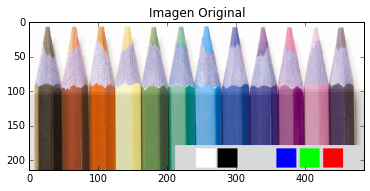

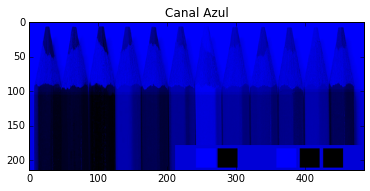

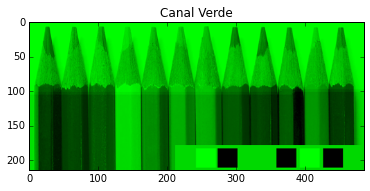

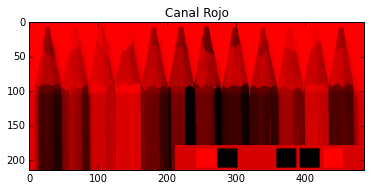

In [16]:
# show the images
plt.figure()
plt.imshow(img1)
plt.title('Imagen Original')
plt.figure()
plt.imshow(img1_blue)
plt.title('Canal Azul')
plt.figure()
plt.imshow(img1_green)
plt.title('Canal Verde')
plt.figure()
plt.imshow(img1_red)
plt.title('Canal Rojo')
plt.show()

### 5. Mostrar los efectos del muestreo y la cuantizacion en una imagen dada.

Las imágenes digitales en escala de grises son representadas por matrices en las cuales sus elementos son 
las intensidades de los píxeles en las coordenada $[x;y]$ se representa por ello a una imágen de (N por M)
 píxeles como una función
$f[x;y]$ ,el proceso de obtención de esta imágen proviene de haber muestreado una imágen continua $f(x;y)$ con 
un período de muestreo (si el muestreo es uniforme) $T$ . 



$$
\begin{equation}
f[x;y]=
\begin{bmatrix}
 f[0;0] & f[0;1] & ...&f[0,N-1] \\
 : & : & : \\
 : & : & : \\
 f[M-1;0] & f[M-1;1] & ...&f[M-1;N-1]
\end{bmatrix}
\end{equation}
$$
 Si realizamos nuevamente el proceso de muestrear la señal
digital, lo que estaremos haciendo es simplemente reduciendo su tamaño ya que al muestrear nuevamente tomamos
 una muestra si otra no , una si otra no de la imagen original (si $T=2$)
 $$
\begin{equation}
f_{s}[x;y]=
\begin{bmatrix}
 f[0;0] & f[0;3] & ...&f[0,N-3] \\
 : & : & : \\
 : & : & : \\
 f[M-3;0] & f[M-3;3] & ...&f[M-3;N-3]
\end{bmatrix}
\end{equation}
$$

In [17]:
# images taked with poor ligth
path1 = '../Imagenes/Globos.bmp'
img1 = cv2.imread(path1, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img1_muestreada = np.zeros_like(img1)

In [18]:
# Slicing
img1_muestreada[0:-1:4, 0:-1:4] = img1[0:-1:4, 0:-1:4]

In [19]:
# cuantizacion
niveles = 4
I_cuant = np.floor(img1*((256/niveles)-1))

In [20]:
(256/niveles)-1

63

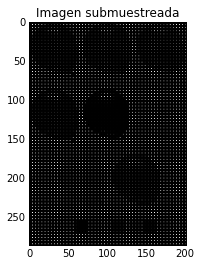

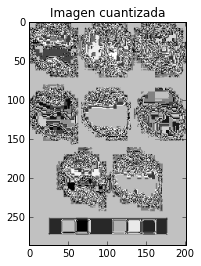

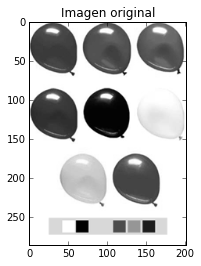

In [21]:
plt.figure()
plt.imshow(img1_muestreada, cmap='gray')
plt.title('Imagen submuestreada')
plt.figure()
plt.imshow(I_cuant, cmap='gray')
plt.title('Imagen cuantizada')
plt.figure()
plt.imshow(img1, cmap='gray')
plt.title('Imagen original')
plt.show()

El efecto visible que se nota al realizar un submuestreo es el de píxelamiento de la imagen ya que hemos sacado
información de la misma.

La cuantización de una imagen digital, se trata simplemente de cuantizar los niveles en que están representadas
en las intensidades de los píxeles, la mayoría de las imágenes están representadas en 8 bits.

### 6. Desarrollar una funcion que permita calcular el histograma de una imagen en tonos de gris y lo muestre en pantalla.

##Histogramas

El histograma de una imagen con $L$ niveles posibles de intensidad de pixeles en el rango $[0,G]$ es definido como una función discreta:

$$h(r_{k})=n_{k}$$

Donde: $r_{k}$ es el $k$-esimo nivel de intesidad en el intervalo $[0,G]$ y $n_{k}$ es el número de pixeles en la imagen cuyo nivel de intesidad es $r_{k}$

In [22]:
def histograma(image):
    """
    Compute the histogram of a uint8 image(grayscale)
    
    inputs
    -------
    image: a grayscale image
    
    output
    ------
    h: numpy array with the probabilities of each pixel
    """
    h = np.zeros(256, dtype=float)
    image = image.astype(np.uint8)
    for i in xrange(256):
        x = np.array([])
        x = np.argwhere(image == i)
        if (len(x) == 0):
            continue
        h[i] = len(x) / float(image.size)  # Normalizamos
    return h

In [23]:
path1 = '../Imagenes/sci-2.bmp'
path2 = '../Imagenes/sci-3.bmp'
path3 = '../Imagenes/sci-4.bmp'
path4 = '../Imagenes/tar-5.bmp'
path5 = '../Imagenes/tar-6.bmp'
path6 = '../Imagenes/tar-7.bmp'

In [24]:
img1 = cv2.imread(path1, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img2 = cv2.imread(path2, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img3 = cv2.imread(path3, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img4 = cv2.imread(path4, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img5 = cv2.imread(path5, cv2.CV_LOAD_IMAGE_GRAYSCALE)
img6 = cv2.imread(path6, cv2.CV_LOAD_IMAGE_GRAYSCALE)


In [25]:
hist1 = histograma(img1)
hist2 = histograma(img2)
hist3 = histograma(img3)
hist4 = histograma(img4)
hist5 = histograma(img5)
hist6 = histograma(img6)

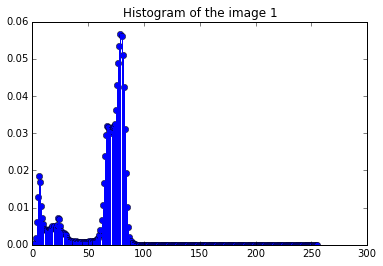

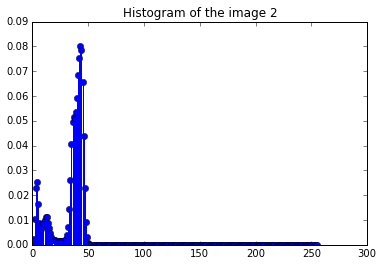

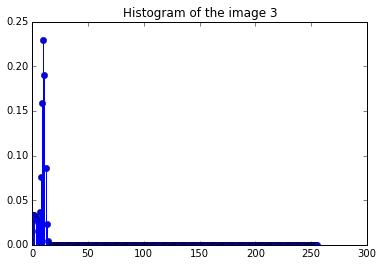

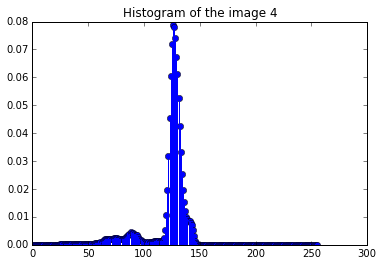

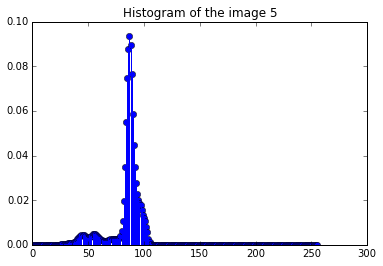

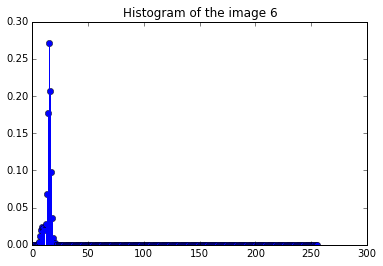

In [26]:
#plots
plt.figure()
plt.stem(np.arange(256), hist1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Histogram of the image 1')
plt.figure()
plt.stem(np.arange(256), hist2, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Histogram of the image 2')
plt.figure()
plt.stem(np.arange(256), hist3, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Histogram of the image 3')
plt.figure()
plt.stem(np.arange(256), hist4, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Histogram of the image 4')
plt.figure()
plt.stem(np.arange(256), hist5, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Histogram of the image 5')
plt.figure()
plt.stem(np.arange(256), hist6, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Histogram of the image 6')

###8. Hallar un valor de segmentacion optimo (en forma manual o automatica) para cada una de las imagenes tomadas en el punto 1 (6 imagenes).Mostrar los resultados

In [27]:
def segmentacion_auto_Gonz(image):
    """
    Calculate a optimal segmentation value
    
    Entrada: image (grayscale)
    -------
    Salida: T (float segmentation value)
    ------
    """

    T = 0.5 * (np.min(image) + np.max(image))
    flag = False
    while not flag:
        g = image >= T
        T_next = 0.5 * (np.mean(image[g]) + np.mean(image[np.invert(g)]))
        flag = np.abs(T - T_next) < 0.5
        T = T_next
    return T

In [28]:
T1 = segmentacion_auto_Gonz(img1)
T2 = segmentacion_auto_Gonz(img2)
T3 = segmentacion_auto_Gonz(img3)
T4 = segmentacion_auto_Gonz(img4)
T5 = segmentacion_auto_Gonz(img5)
T6 = segmentacion_auto_Gonz(img6)

In [29]:
#Los valores de segmentacion hallados
print T1
print T2
print T3
print T4
print T5
print T6

45.1060791195
24.5473990792
6.54337040221
103.4681427
69.8753724524
12.1079772462


In [30]:
#Magia¡¡¡ 
img1_bin = img1 < T1
img2_bin = img2 < T2
img3_bin = img3 < T3
img4_bin = img4 < T4
img5_bin = img5 < T5
img6_bin = img6 < T6

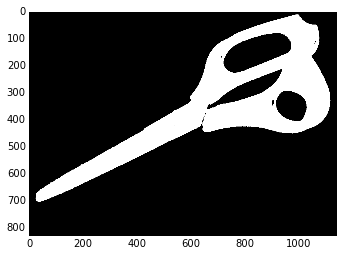

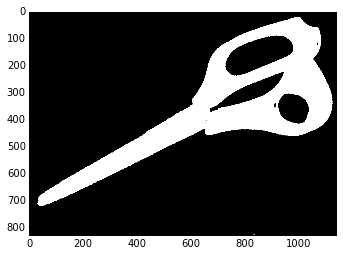

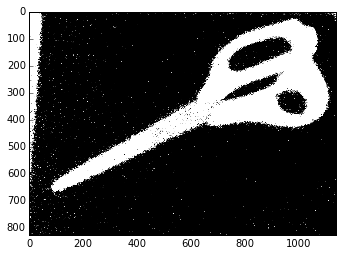

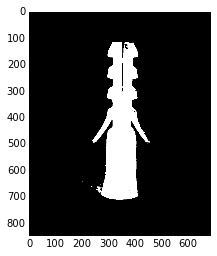

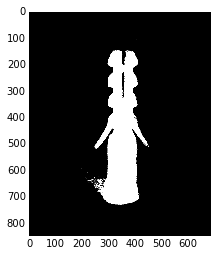

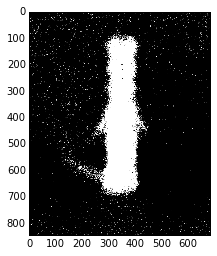

In [31]:
#plots

plt.figure()
plt.imshow(img1_bin, cmap='gray')
plt.figure()
plt.imshow(img2_bin, cmap='gray')
plt.figure()
plt.imshow(img3_bin, cmap='gray')
plt.figure()
plt.imshow(img4_bin, cmap='gray')
plt.figure()
plt.imshow(img5_bin, cmap='gray')
plt.figure()
plt.imshow(img6_bin, cmap='gray')